# _Clustering_ 

Supongamos que quieres crear un sistema que tome algunas fotos de cada articulo en una linea de produccion manufacturera y detectar cuales son defectuosos. Facilmente se puede crear un sistema que este tomando fotografias automaticamente, y eso podria dar miles de fotos cada dia. En pocas semenas se tendria un conjunto de datos razonablemente grande. Pero _**no estan etiquetados**_. Si se quiere entrenar un clasificador binario que prediga cuando un articulo es defectuoso o no, se tendria que etiquetar cada fotografia como "defectousa" o "normal". Lo cual requeriria un humano experto que se siente y analice cada foto. Lo cual es una tarea tardada, costosa y tediosa. Y mas aun cuando la compañia haga cambios en sus productos, este proceso necesitara comenzar desde cero otra vez. ¿No sería fantástico si el algoritmo pudiera explotar los datos sin etiquetar sin necesidad de que los humanos etiqueten cada imagen? Aqui es donde entrea el _**Aprendizaje no supervisado**_. 

Al caminar por la montaña, una vez me encontre una palnta que no habia visto jamas. Mire al rededor y note algunas mas. No son perfectamente identicas pero son lo suficientemente parecidas para saber que lo mas probable es que pertenezcan a la misma especia (o genero). Esto es lo que se llama _**clustering**_: es la tarea de indentificar instancias similares y asignarlas en _clusters_, por ejemplo, grupos de instancias similares.

## K-Means


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [2]:
## Importando dataset
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
############################################
# Seleccionando caracteristicas de interes #
############################################

features = ['petal length (cm)', 'petal width (cm)']
# Creando Matriz de caracteristicas
x = iris_df.loc[:, features].values

# Esta variable tiene solo proposito demostrativo. NO ES NECESARIA PARA EL K-Means
y = data.target

#### Estandarizando los datos

K-Means se ve afectado por la escala, por lo que es necesario escalar las características de los datos antes de usar KMeans. Puede transformar los datos a escala unitaria (media = 0 y varianza = 1) para un mejor rendimiento. <br>

`StandardScaler` del Scikit-Learn ayuda a estandarizar nuestro conjunto de datos.

In [6]:
#####################################
# Estandarizando con StandardScaler #
#####################################

x = StandardScaler().fit_transform(x)

### Graficando los datos para estimar el numero de _clusters_.

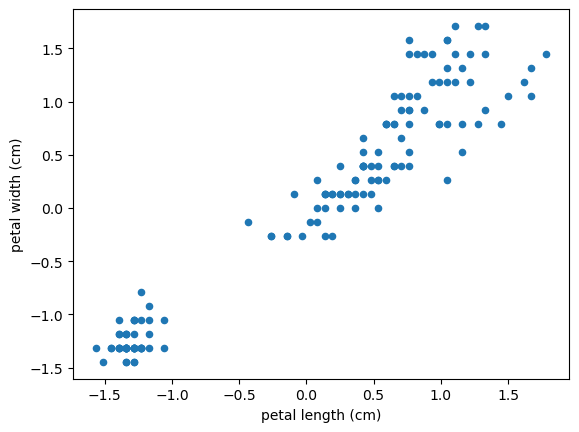

In [7]:
# Plot 
pd.DataFrame(x, columns = features).plot.scatter('petal length (cm)','petal width (cm)' )

# Add labels
plt.xlabel('petal length (cm)');
plt.ylabel('petal width (cm)');

In [11]:
######################################
# Instanciando KMeans con 3 clusters #
######################################

kmeans = KMeans(n_clusters=3, n_init='auto') # n_init  es el numero de veces que el algoritmo k-means se ejecutara con diferentes centroides. 

# Ajustando modelo
kmeans.fit(x)

KMeans(n_clusters=3, n_init='auto')

In [14]:
###############################################################
# Obteniendo las etiquetas y los centrodies de los n clusters #
###############################################################

labels = kmeans.labels_
print(labels)
centroids = kmeans.cluster_centers_
print(centroids)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[ 0.3058728   0.16541778]
 [-1.30498732 -1.25489349]
 [ 1.02799959  1.12797813]]


### Evaluar visualmente los Clusters.

In [13]:
x = pd.DataFrame(x, columns=features)

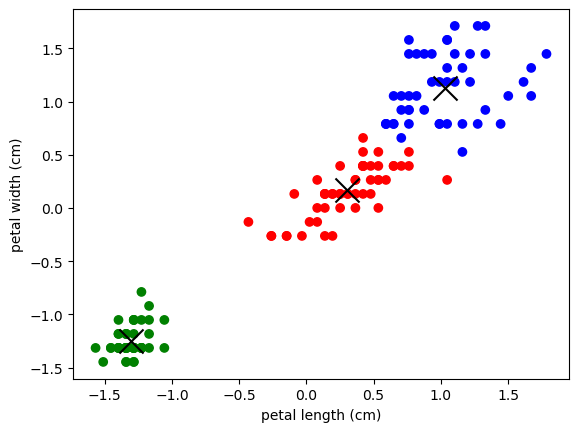

In [15]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colormap[labels])
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, marker='x', c='k')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

### Evaluar visualmente los clusters y comparar con los datos originales.

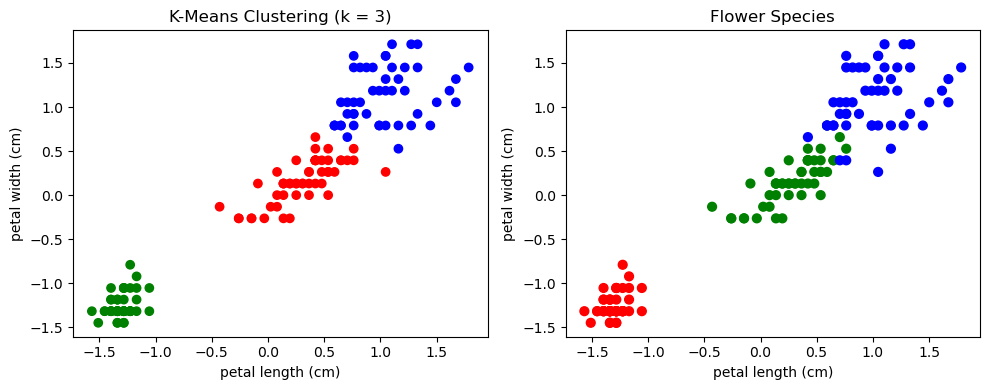

In [19]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colormap[labels])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('K-Means Clustering (k = 3)')
 
plt.subplot(1, 2, 2)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colormap[y], s=40)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('Flower Species')

plt.tight_layout()
plt.show()

Parecen muy similares. Recordemos que solo se estan usando dos caracteristicas en el algoritmo K-Means.

Asi que se puede usar K-Means para darle estructura a los datos. 